# PKI incidents data analysis

*work in-progress <br>
code author: Jack Ruocco

1. import packages

note: This .py file and the Excel file have to be in a same folder

In [30]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
#read the file
# data = pd.read_excel('Hilda_Jack_PKI_incidents_db.xlsx', sheet_name = 'db2csv')
data = pd.read_excel('UpdatedDB.xlsx', sheet_name = 'UpdatedDB')
#replace NaN values with ''
data = data.replace(np.nan,'')

In [4]:
#only show the first 10 rows
data.tail(5)

,Year,Root CA,Problematic CA,Relation to Root,Issue,Cause,Consequence,Self report from CA?,References,collected on or before,Bug Status,Notes:
614,2019,TeliaSonera,TeliaSonera,,Failed weekly security configuration reviews,Operational error,Improved monitoring of reviewing systems,Yes,-https://bugzilla.mozilla.org/show_bug.cgi?id=...,2020-03-20,Open,
615,2020,GlobalSign,GlobalSign,,Non-BR-compliant or problematic OCSP responder...,Infrastructure problem,Unknown,No,-https://bugzilla.mozilla.org/show_bug.cgi?id=...,2020-03-20,Open,
616,2020,Microsec,Microsec,SubCA,Fields in certificates not compliant to BR,Non-optimal request check,Additional training for employees and increase...,Yes,-https://bugzilla.mozilla.org/show_bug.cgi?id=...,2020-03-20,Open,
617,2020,GlobalSign,GlobalSign,SubCA,Late revocation of certificate with compromise...,Operational error,Improved process for escalating reports of com...,Yes,-https://bugzilla.mozilla.org/show_bug.cgi?id=...,2020-03-20,Closed,
618,2020,Camerfirma,Camerfirma,SubCA,Fields in certificates not compliant to BR,Unknown,Unknown,Yes,-https://bugzilla.mozilla.org/show_bug.cgi?id=...,2020-03-20,Open,


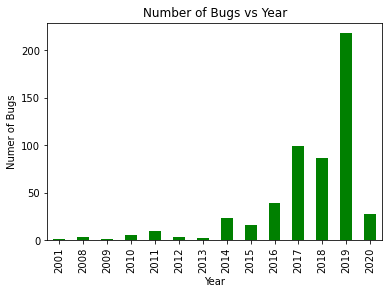

In [5]:
countGraph = data.groupby('Year')['References'].nunique().plot(kind='bar', color = 'green', title="Number of Bugs vs Year")
countGraph.set_ylabel("Numer of Bugs")
plt.show()

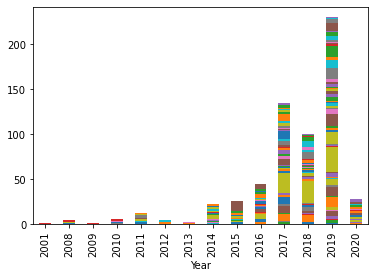

In [6]:
data.assign(dummy = 1).groupby(['Year','Root CA']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)
plt.show()

In [7]:
#create 
country_names = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, the Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, the former Yugoslav Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine, State of', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Reunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthelemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'South Korea', 'Iran','Russia','Taiwan','Vietnam','Republic of Korea','Venezuela','Palestine','Phillipines','North Korea','Syria','Tajikstan','Brunei','Tibet']

In [8]:
caToCountry = {'ACCV':'Spain','Actalis':'Italy','AffirmTrust':'USA','Amazon':'USA','ANSSI':'France','Asseco':'Poland',
'Atos':'Germany','Belgium Root CA':'Belgium','Buypass':'Norway','Camerfirma':'Spain','Certicamara':'Colombia',
'Certigna':'France','Certinomis':'France','Certplus':'France','CertSIGN':'Romania','Certum':'Poland',
'China Financial Certification Authority':'China','Chunghwa Telecom eCA':'Taiwan','CNNIC':'China','Comodo':'UK',
'Consorci AOC':'Spain','CyberTrust':'Ireland','Cybertrust JP':'Japan','D-TRUST':'Germany',
'Dell Inc. Enterprise Issuing CA1':'USA','DFN':'Germany','DigiCert':'USA','DigiNotar':'Netherlands','Disig':'Slovak Republic',
'DocuSign':'France','E-Guven':'Turkey','E-Tugra':'Turkey','EBG Elektronik Sertifika':'Turkey','Entrust':'Canada',
'Firmaprofesional':'Spain','FNMT':'Spain','GDCA':'China','Generalitat Valenciana CA':'Spain','GeoTrust':'USA',
'GlobalSign':'USA','GoDaddy':'USA','Google Trust Services':'USA','Government of Spain':'Spain','GRCA (TW)':'Taiwan',
'HARICA':'Greece','Hong Kong Post':'Hong Kong','IdenTrust':'USA','India CCA':'India','Izenpe':'Spain','Kamu':'Turkey',
'Kazakhstan CA':'Kazakhstan','KIR':'Poland','Korean Local Information Research & Development Institute':'Korea',
'KPN':'Netherlands','Let\'s Encrypt':'USA','LuxTrust':'Luxembourg','Microsec':'Hungary','Microsoft':'USA','NetLock':'Hungary',
'PKloverheid':'Netherlands','QuoVadis':'Bermuda','RSA':'USA','SECOM':'Japan','Sectigo':'UK','SecureTrust':'USA',
'Sertifitseerimiskeskuse':'Estonia','SNCE Venezuela':'Venezula','Sonera':'Finland','SSL.com':'USA',
'Staat der Nederlanden Root CA':'Netherlands','StartCom':'China','Swisscom':'Switzerland','SwissSign':'Switzerland',
'Symantec':'USA','T-Systems':'Germany','TeliaSonera':'Finland','Thawte':'South Africa','TrustCor':'Panama','Trustis':'UK',
'Trustwave':'USA','TWCA':'Taiwan','TÜBITAK UEKAE':'Turkey','TÜRKTRUST':'Turkey','VeriSign':'USA','VISA':'USA',
'WISeKey':'Switzerland','WoSign ':' China'}

In [9]:
countryCATable = pd.DataFrame(caToCountry.items(), columns=['Root CA', 'Country'])
countryCATable.tail(10)

,Root CA,Country
77,TrustCor,Panama
78,Trustis,UK
79,Trustwave,USA
80,TWCA,Taiwan
81,TÜBITAK UEKAE,Turkey
82,TÜRKTRUST,Turkey
83,VeriSign,USA
84,VISA,USA
85,WISeKey,Switzerland
86,WoSign,China


In [10]:
countryCount = countryCATable.groupby("Country").count()
countryCount.tail(5)

,Root CA
Country,
Taiwan,3
Turkey,6
UK,3
USA,18
Venezula,1


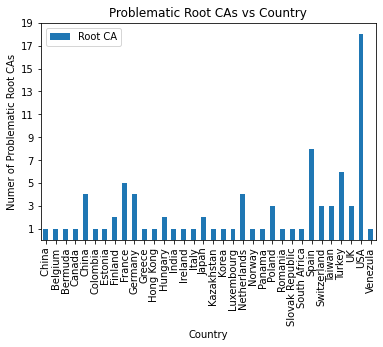

In [11]:
countryPlot = countryCount.plot(kind = 'bar', yticks = [1,3,5,7,9,11,13,15,17,19], title="Problematic Root CAs vs Country")
countryPlot.set_ylabel("Numer of Problematic Root CAs")
plt.show()

In [12]:
causeVersusIssue = data["Issue"].value_counts()
refined = pd.DataFrame(causeVersusIssue[0:16])
refined.reset_index(inplace = True)
refined.rename(columns = {"index" : "Issue Type", "Issue": "Issue Count"}, inplace = True)
otherCount = 0
for i in causeVersusIssue[16:causeVersusIssue.shape[0]]:
    otherCount+=i
refined = refined.append({"Issue Type": "Other", "Issue Count": otherCount},ignore_index=True)
print(refined)

                                           Issue Type  Issue Count
0          Fields in certificates not compliant to BR          248
1      Erroneous/Misleading/Late/Lacking Audit report           53
2   Non-BR-compliant or problematic OCSP responder...           50
3   Repeated/Lacking appropriate entropy Serial Nu...           48
4                                   Undisclosed SubCA           23
5             Possible issuance of rogue certificates           19
6                                   512/1024 bits key           18
7                 Use of SHA-1/MD5  hashing algorithm           15
8                                    CAA mis-issuance           14
9                                   Rogue certificate           12
10                        CA/RA/SubCA/Reseller hacked           11
11                                 CPS non-compliance           11
12  Failure to revoke certificates in a timely manner           10
13                              Not allowed ECC usage         

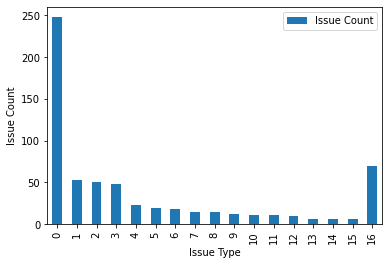

In [53]:
ax = refined.plot.bar()
ax.set_ylabel("Issue Count")
ax.set_xlabel("Issue Type")
plt.show()

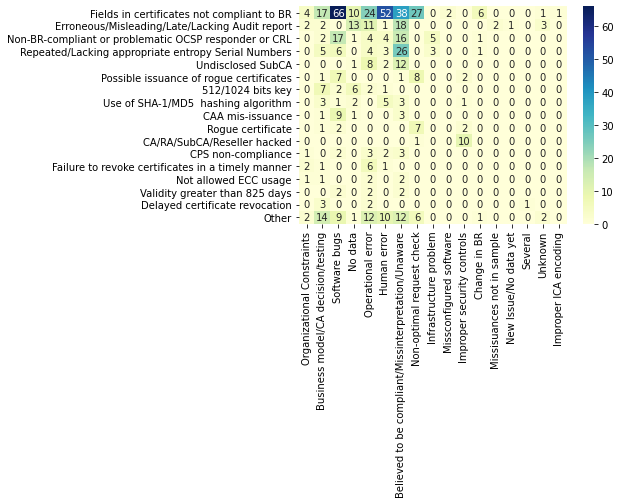

In [14]:
cause = pd.DataFrame(index = refined["Issue Type"].unique(), columns = data["Cause"].unique()).fillna(0)
causeData = data.groupby(["Issue", "Cause"]).size().reset_index(name="Number")

for row in causeData.iterrows():
    if(row[1][0] not in (list)(cause.index)):
        cause[row[1][1]]["Other"]+=row[1][2]
    else:
        cause[row[1][1]][row[1][0]]+=row[1][2]   
sns.heatmap(cause, annot=True, cmap="YlGnBu")

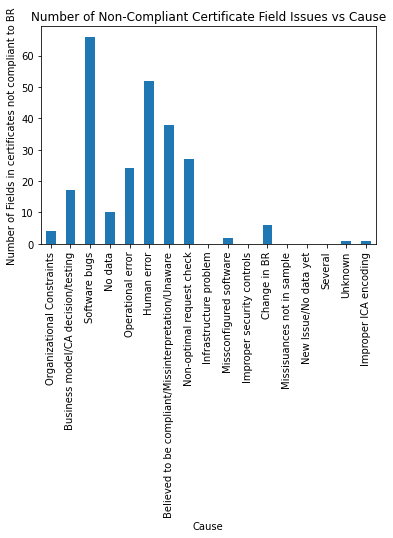

In [57]:
causeGraph = cause.loc['Fields in certificates not compliant to BR', : ].plot.bar()
causeGraph.set_ylabel('Number of Fields in certificates not compliant to BR')
causeGraph.set_xlabel('Cause')
causeGraph.set_title("Number of Non-Compliant Certificate Field Issues vs Cause")
plt.show()

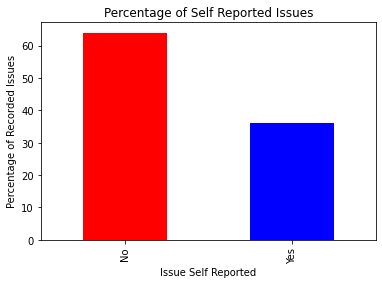

In [59]:
total = data["Self report from CA?"].count()
breakdown = data["Self report from CA?"].value_counts()
percentYes = (breakdown["Yes"]/total)*100
percentNo = (breakdown["No"]/total)*100
if(percentYes % 1 >= percentNo % 1):
    breakdown["Yes"] = math.ceil(percentYes)
    breakdown["No"] = percentNo
else:
    breakdown["No"] = math.ceil(percentNo)
    breakdown["Yes"] = percentYes
graph = breakdown.plot.bar(y = "Percent", title = "Percentage of Self Reported Issues", color = ['r','b'])
graph.set_ylabel('Percentage of Recorded Issues')
graph.set_xlabel('Issue Self Reported')
plt.show()

TO DO NEXT:
1. the % of problematic CAs in each root CA by country